In [1]:
from __future__ import division

import os; os.chdir(os.path.join('..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/School/Grad work/5HTGIF


In [2]:
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
DATAPATH = os.path.join('data', 'processed', 'noise_comparison')

md_vals = {}
for timescale in ['3', '50']:
    with open(os.path.join(DATAPATH, 'Md_{}ms.ldat'.format(timescale)), 'rb') as f:
        md_vals[timescale] = pickle.load(f)
        f.close()


In [4]:
md_vals

{'3': {'Md_vals': [0.5111028352835842,
   0.42846149093864455,
   0.3487319861239801,
   0.6064388100169623],
  'names': ['DRN436', 'DRN438', 'DRN439', 'DRN440'],
  'predictions': [<src.SpikeTrainComparator.SpikeTrainComparator instance at 0x1a15627998>,
   <src.SpikeTrainComparator.SpikeTrainComparator instance at 0x1c15888518>,
   <src.SpikeTrainComparator.SpikeTrainComparator instance at 0x1c158885f0>,
   <src.SpikeTrainComparator.SpikeTrainComparator instance at 0x1c158887e8>]},
 '50': {'Md_vals': [0.22430292974463875,
   0.09520993020903465,
   0.281257964897928,
   0.23965896992084532],
  'names': ['DRN436', 'DRN438', 'DRN439', 'DRN440'],
  'predictions': [<src.SpikeTrainComparator.SpikeTrainComparator instance at 0x1c15888680>,
   <src.SpikeTrainComparator.SpikeTrainComparator instance at 0x1c15888950>,
   <src.SpikeTrainComparator.SpikeTrainComparator instance at 0x1c1596a0e0>,
   <src.SpikeTrainComparator.SpikeTrainComparator instance at 0x1c1596a1b8>]}}

In [5]:
md_df = pd.DataFrame()
for timescale in md_vals:
    tmp_df = pd.DataFrame(md_vals[timescale])
    tmp_df['timescale'] = timescale
    md_df = md_df.append(tmp_df)
md_df.reset_index(inplace=True, drop=True)

In [6]:
md_df

,Md_vals,names,predictions,timescale
0,0.511103,DRN436,<src.SpikeTrainComparator.SpikeTrainComparator...,3
1,0.428461,DRN438,<src.SpikeTrainComparator.SpikeTrainComparator...,3
2,0.348732,DRN439,<src.SpikeTrainComparator.SpikeTrainComparator...,3
3,0.606439,DRN440,<src.SpikeTrainComparator.SpikeTrainComparator...,3
4,0.224303,DRN436,<src.SpikeTrainComparator.SpikeTrainComparator...,50
5,0.095210,DRN438,<src.SpikeTrainComparator.SpikeTrainComparator...,50
6,0.281258,DRN439,<src.SpikeTrainComparator.SpikeTrainComparator...,50
7,0.239659,DRN440,<src.SpikeTrainComparator.SpikeTrainComparator...,50


In [7]:
md_df.pivot(index='timescale', columns='names', values='Md_vals')

names,DRN436,DRN438,DRN439,DRN440
timescale,,,,
3,0.511103,0.428461,0.348732,0.606439
50,0.224303,0.095210,0.281258,0.239659


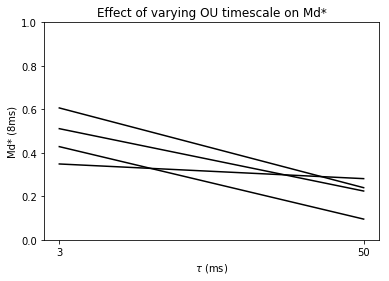

In [8]:
plt.figure()

plt.subplot(111)
plt.title('Effect of varying OU timescale on Md*')
plt.plot(md_df.pivot(index='timescale', columns='names', values='Md_vals').values, 'k')
plt.xticks([0, 1], ['3', '50'])
plt.xlabel(r'$\tau$ (ms)')
plt.ylim(0, 1)
plt.ylabel('Md* (8ms)')

plt.show()

Looks like reducing the time constant of the OU noise to 3ms (what we used for SOM and pyr cells) improves Md* pretty significantly.

Percentage of variance explained: 29.9


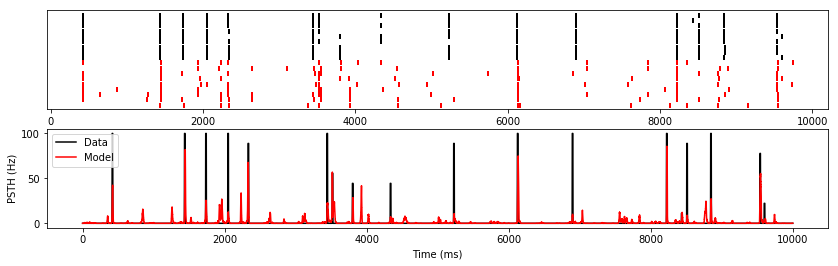

In [18]:
md_df.loc[3, 'predictions'].plotRaster()

Percentage of variance explained: 3.4


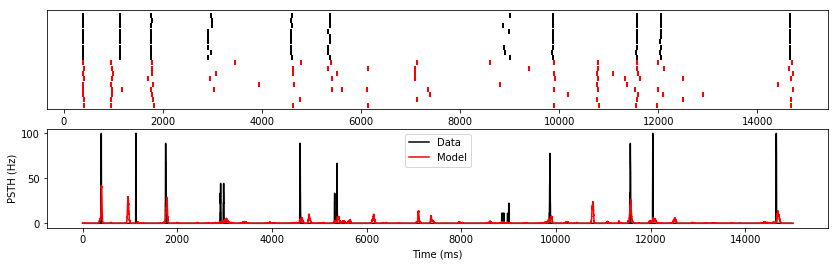

In [19]:
md_df.loc[7, 'predictions'].plotRaster()

Upper plot is with $\tau$ = 3ms, lower plot is with $\tau$ = 50ms in same cell.